<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/sine_training_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow version installed,2.9.2
keras version installed,2.9.0
numpy version installed,1.21.6
matplotlib version installed, 3.2.2
629 points plotting
Epoch 1/2000
20/20 [==============================] - 1s 4ms/step - loss: 0.4049
Epoch 2/2000
20/20 [==============================] - 0s 5ms/step - loss: 0.2786
Epoch 3/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.2041
Epoch 4/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1618
Epoch 5/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.1488
Epoch 6/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 7/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1424
Epoch 8/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1315
Epoch 9/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.1244
Epoch 10/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1192
Epoch 11/2000
20/20 [================

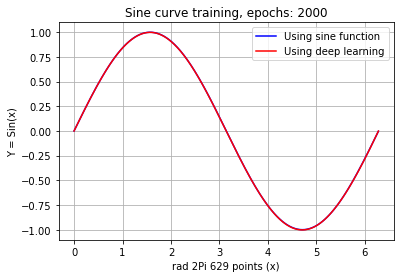

Here is what i learn:[array([[ 0.11928964,  0.3811025 ,  0.12081295,  0.14463282,  0.5473727 ,
        -0.12690857, -0.11417551, -0.41584212,  0.09732269,  0.2890121 ,
        -0.32698557,  0.07031594,  0.11593216,  0.09311747, -0.10918313,
         0.4341613 ,  0.21038215, -0.1047698 ,  0.359351  , -0.1050679 ,
         0.06728262, -0.35254198, -0.16728021, -0.87563235,  0.09356376,
         0.10510691,  0.420005  , -0.41774982,  0.3795877 ,  0.12254181,
         0.15927713, -0.5038836 ]], dtype=float32), array([-0.39235052,  0.03018229, -0.25274956, -0.5134174 , -0.06184575,
        0.48322254,  0.23580188,  0.37224504, -0.17179717, -0.25681707,
        0.97871214, -0.25856084, -0.10229375, -0.25022972,  0.14364998,
        0.0105212 , -0.21892165,  0.22978806, -0.3465807 ,  0.42139778,
       -0.39104143,  0.9696946 ,  0.6562302 , -0.06432245,  0.02966965,
       -0.20674706, -0.9751158 ,  0.88531595, -0.35851607, -0.46289378,
       -0.6561919 ,  0.42290756], dtype=float32)]


In [1]:
'''
One neural one layer
Learning Sine function

'''
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
tf.config.experimental.set_visible_devices([],'GPU')    # run on GPU

# Module Version
print(f"tensorflow version installed,{tf.__version__}")
print(f"keras version installed,{tf.keras.__version__}")
print(f"numpy version installed,{np.__version__}")
print("matplotlib version installed,",mp.__version__)

pi = np.pi                           # 3.14169256
act_fun = "tanh" # sin函數這種"平滑線"激勵函數建議使用例如tanh
hidden = 32 # 增加神經元數量增強模型擬合能力
neu = Dense(units = hidden, input_shape = [1],activation = act_fun)
neu2 = Dense(units = hidden, input_shape = [hidden],activation = act_fun)
neu3 = Dense(units = 1, input_shape = [hidden],activation = None)
model = Sequential([neu,neu2,neu3])#增加層數正所謂"深度學習"
model.compile(optimizer='adam', loss='mean_squared_error') #使用adam比sgd更快收斂

# Data for plotting sine function

x = np.arange(0.0, 2*pi, 0.01)       # from radians 0.0 to 2pi, interval 0.01
y = np.sin(x)                        # range from -1:1
# y = (np.sin(x)+1)/2                # normalize sin between 0:1 for sigmoid

print(f"{len(x)} points plotting")
epochsNo = 2000 # 200 調升至 2000 訓練久一些讓模型loss降低更多
model.fit(x , y , epochs = epochsNo)
print("--------------guess from here------------------------")
y_pred = model.predict(x)
print(y_pred.shape)
    

#plotting
fig, ax = plt.subplots()
ax.plot(x,y,color='blue',label='Using sine function')
ax.plot(x,y_pred,color='red',label='Using deep learning')

ax.set(xlabel='rad 2Pi '+str(len(x))+' points (x)', ylabel='Y = Sin(x)',
       title='Sine curve training, epochs: '+ str(epochsNo))
ax.grid()
filename = "sin_epochs" + str(epochsNo) + ".png"
fig.savefig(filename)
ax.legend()
plt.show()

print(f"Here is what i learn:{neu.get_weights()}")
